# Santander Customer Transaction Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")  #calling the dataset
train.head() #First Five rows

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
test = pd.read_csv("test.csv")
test =test.drop(["ID_code"],axis =1)
test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [4]:
train.iloc[:,2:].describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,6.618800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,7.629600,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,8.584425,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,11.150600,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


There is very high difference between the range of values. i.e between the min and max values of most of the datasets.
Lets check if this dataset has any missing data.

In [5]:
def missing_data(data):
    null = data.isnull().sum()
    percent = (null/data.isnull().count()*100)
    null_table = pd.concat([null,percent],axis = 1, keys = ["Total","percent"])
    return np.transpose(null_table)

In [6]:
missing_data(train.iloc[:,2:])

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


20098


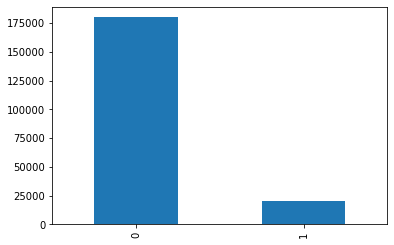

In [7]:
train["target"].value_counts().plot(kind = "bar")
print(train["target"].value_counts()[1])# creating a bar chart to view the data
plt.show()

The data from above seems to be heavily skewed. Hence we can't use all the data containing 0 as this will over fit my prediction model. In order to prevent the over bias we need to use random data of 25000 0's and 1's

Since data is imbalanced I will not be taking the whole data set I will be dividing the dataset and taking ony the same amount of 0's as 1's. But lets first explore the rest of the data.

In [8]:
print("Skewness: {}".format(train["target"].skew()))
print("Kurtosis: {}".format(train["target"].kurt()))

Skewness: 2.6576420477382454
Kurtosis: 5.063111884925181


Lets Finds the importance of all the feautres for prediction and how we can use them to extract insight.

In [9]:
cols = ["ID_code","target"]
X = train.drop(cols,axis =1)
y = train["target"]

In [10]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)

20098


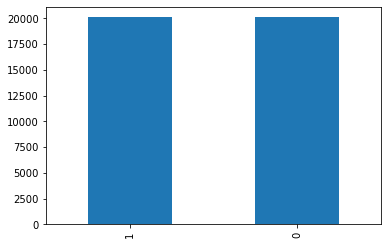

In [11]:
y_under.value_counts().plot(kind = "bar")
print(y_under.value_counts()[1])# creating a bar chart to view the data
plt.show()

In order to check feature importance we can use Random forest classifier and eli5 which is a python package used to get more idea about how a classifier or predictior has worked

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.33, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [14]:
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_test.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
var_81,0.017496
var_139,0.014004
var_12,0.012854
var_53,0.011969
var_26,0.010157
...,...
var_41,0.003616
var_27,0.003597
var_129,0.003596
var_189,0.003514


Feature importance shows which variables affect our prediction. From above we can that var_81 has the highest effect on out target

C:\Users\sunsu\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


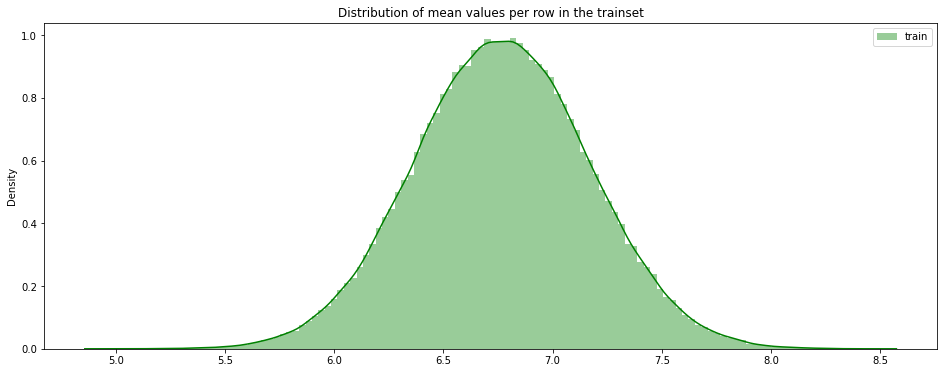

In [15]:
plt.figure(figsize=(16,6))
features = X_train.columns
plt.title("Distribution of mean values per row in the trainset")
sns.distplot(train[features].mean( axis=1),color="green", kde=True,bins=120, label='train')
plt.legend()
plt.show()

C:\Users\sunsu\Miniconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


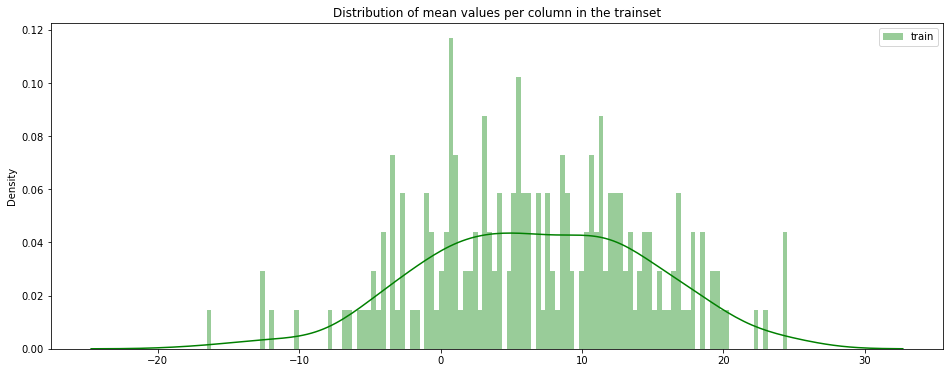

In [16]:
plt.figure(figsize=(16,6))
features = X_train.columns
plt.title("Distribution of mean values per column in the trainset")
sns.distplot(train[features].mean( axis=0),color="green", kde=True,bins=120, label='train')
plt.legend()
plt.show()

Lets round the values to only 2 decimals first

In [17]:
X_train = X_train.round(2)
X_test = X_test.round(2)
X_train

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
280,11.60,-3.47,11.45,4.91,12.38,6.44,4.40,18.84,5.24,9.49,...,-1.26,12.26,0.33,5.23,22.10,2.11,-2.61,10.97,17.32,-4.09
31204,18.01,-1.17,8.61,9.51,10.21,-16.63,3.95,18.01,-0.77,6.25,...,3.54,3.72,2.13,-0.50,20.81,0.49,-6.17,6.94,9.22,12.39
38221,8.97,0.39,16.98,5.72,11.81,-10.79,4.58,16.73,1.75,6.91,...,-1.04,11.68,1.60,3.36,13.69,-0.54,3.32,8.66,16.64,-8.91
38942,12.07,-6.04,12.31,7.53,14.11,-0.28,5.56,18.85,-4.24,8.71,...,-1.65,8.06,2.68,2.96,19.15,2.65,-7.58,8.06,15.63,-7.03
39760,10.46,-6.05,12.40,6.89,10.04,-14.32,5.01,15.35,0.85,7.22,...,9.48,14.01,1.74,-3.73,15.94,1.32,7.83,8.84,16.27,-3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,14.21,-2.72,13.10,5.02,9.45,-7.89,4.90,12.48,-3.04,9.32,...,3.30,2.77,-0.08,1.90,15.96,-0.44,-1.45,8.17,21.05,-7.38
11284,13.45,0.16,11.24,8.89,13.46,-4.27,5.42,12.07,-3.56,7.86,...,7.84,9.34,3.06,7.93,20.41,-1.91,-2.09,9.28,15.89,4.92
38158,13.89,2.05,6.67,7.64,12.33,1.12,3.92,14.64,-1.25,5.68,...,0.90,2.88,1.40,2.19,13.54,1.60,3.26,7.91,14.60,14.59
860,16.37,-3.01,10.59,6.90,12.04,-8.69,6.33,14.91,-2.37,6.44,...,7.16,4.75,1.34,3.16,21.86,2.74,12.87,9.91,15.17,-15.65


In [18]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_scaled)
X_train

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.561147,0.458171,0.550875,0.362150,0.674974,0.769834,0.328152,0.577909,0.802555,0.810398,...,0.371468,0.779082,0.361257,0.581888,0.704377,0.782656,0.365940,0.864675,0.558742,0.530120
1,0.883744,0.557867,0.366818,0.720405,0.449637,0.237777,0.250432,0.536982,0.482704,0.314985,...,0.538891,0.323372,0.518325,0.361079,0.631040,0.604830,0.251764,0.156415,0.111969,0.781455
2,0.428787,0.625488,0.909268,0.425234,0.615784,0.372463,0.359240,0.473866,0.616817,0.415902,...,0.379142,0.748132,0.472077,0.509827,0.226265,0.491767,0.556126,0.458699,0.521236,0.456611
3,0.584801,0.346771,0.606610,0.566199,0.854621,0.614852,0.528497,0.578402,0.298031,0.691131,...,0.357865,0.554963,0.566318,0.494412,0.536669,0.841932,0.206543,0.353251,0.465527,0.485283
4,0.503775,0.346337,0.612443,0.516355,0.431983,0.291052,0.433506,0.405819,0.568920,0.463303,...,0.746076,0.872465,0.484293,0.236609,0.354179,0.695939,0.700770,0.490334,0.500827,0.535306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26926,0.692501,0.490681,0.657809,0.370717,0.370717,0.439345,0.414508,0.264300,0.361895,0.784404,...,0.530520,0.272679,0.325480,0.453565,0.355316,0.502744,0.403143,0.372583,0.764479,0.479945
26927,0.654253,0.615518,0.537265,0.672118,0.787124,0.522832,0.504318,0.244083,0.334220,0.561162,...,0.688873,0.623266,0.599476,0.685934,0.608300,0.341383,0.382617,0.567663,0.479868,0.667531
26928,0.676397,0.697443,0.241089,0.574766,0.669782,0.647140,0.245250,0.370809,0.457158,0.227829,...,0.446809,0.278549,0.454625,0.464740,0.217737,0.726674,0.554201,0.326889,0.408715,0.815007
26929,0.801208,0.478110,0.495139,0.517134,0.639668,0.420895,0.661485,0.384122,0.397552,0.344037,...,0.665155,0.378335,0.449389,0.502119,0.690733,0.851811,0.862412,0.678383,0.440154,0.353820


In [19]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
Xt_scaled = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(Xt_scaled)
X_test

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.435870,0.699288,0.471317,0.527301,0.693515,0.853680,0.495463,0.545542,0.636611,0.541033,...,0.229923,0.471898,0.417827,0.635327,0.611857,0.603708,0.786874,0.257603,0.381347,0.615989
1,0.356522,0.563612,0.595176,0.388456,0.214435,0.653812,0.742287,0.264096,0.592070,0.404255,...,0.525853,0.672788,0.297122,0.583823,0.298098,0.694090,0.292287,0.322004,0.235751,0.300478
2,0.248370,0.488434,0.411995,0.626365,0.505230,0.669017,0.411978,0.348434,0.702879,0.489362,...,0.350935,0.765164,0.466110,0.692015,0.509508,0.485516,0.524019,0.288014,0.253886,0.261018
3,0.551087,0.818060,0.502608,0.369735,0.495816,0.876377,0.215971,0.518072,0.491581,0.644377,...,0.477448,0.595437,0.514392,0.429312,0.573266,0.657010,0.844384,0.488372,0.663212,0.244619
4,0.848370,0.685498,0.477184,0.685647,0.678870,0.780740,0.549909,0.144578,0.659424,0.516717,...,0.344334,0.336672,0.654596,0.409264,0.682886,0.594438,0.422192,0.248658,0.473057,0.563034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13260,0.461957,0.805160,0.282269,0.524181,0.358787,0.461216,0.375681,0.240482,0.433460,0.445289,...,0.727173,0.634947,0.592386,0.481161,0.744407,0.628042,0.370433,0.726297,0.395337,0.746156
13261,0.311957,0.342527,0.321382,0.672387,0.479079,0.291538,0.392015,0.261687,0.624117,0.214286,...,0.531720,0.572621,0.482823,0.480124,0.652685,0.509849,0.587618,0.667263,0.397409,0.346430
13262,0.760870,0.902580,0.368970,0.538222,0.791841,0.306963,0.515426,0.517590,0.706138,0.696049,...,0.592959,0.470785,0.533890,0.575527,0.310962,0.730012,0.368065,0.538462,0.592746,0.822515
13263,0.379891,0.564057,0.612777,0.510140,0.733264,0.615029,0.686025,0.467952,0.453015,0.278116,...,0.513385,0.710629,0.570102,0.568960,0.649888,0.381228,0.577131,0.715564,0.237306,0.626751


In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
sgd_clf = SGDClassifier(n_jobs = -1,random_state=42)
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train,cv = 3)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[10185,  3274],
       [ 3261, 10211]], dtype=int64)

In [33]:
from sklearn.metrics import precision_score,recall_score
print("precision scores are {} ".format(precision_score(y_train,y_train_pred))) 
print("recall scores are {} ".format(recall_score(y_train,y_train_pred)))

precision scores are 0.757211716722284 
recall scores are 0.7579423990498813 


In [34]:
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred)

0.757576881700486

In [35]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state = 42)
y_probas = cross_val_predict(forest,X_train,y_train,cv = 3, method = "predict_proba")

In [36]:
from sklearn.metrics import roc_curve
y_scores_f = y_probas[:,1]
fpr_f ,tpr_f ,threshold = roc_curve(y_train,y_scores_f)

In [37]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr,tpr,linewidth =2, label = label)
    plt.plot([0,1],[0,1],"k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


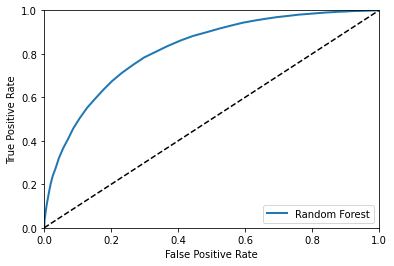

In [38]:
plot_roc_curve(fpr_f,tpr_f,"Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train,y_scores_f)

0.8191821660717099

In [41]:
y_train_pred_f = cross_val_predict(forest, X_train, y_train, cv=3)
precision_score(y_train, y_train_pred_f)

0.7384502923976608

In [42]:
recall_score(y_train, y_train_pred_f)

0.7498515439429929